In [1]:
import numpy as np
import ehtim as eh
from ehtim.movie import Movie
import matplotlib.pyplot as plt
import sys
sys.path.append("../.")

Welcome to eht-imaging! v 1.2.10 



Generate Orbiting Hot Spot Data

In [2]:
# Specify the parameters of the movie of the orbiting hot spot
frame_height, frame_width = 400, 400
num_frames = 110
blob_sigma = 20  # Width of the Gaussian blob
blob_amplitude = 1  # Peak value of the blob
orbit_radius = 50  # Radius of the orbit

# Create grid of x and y coordinates
x = np.linspace(0, frame_width - 1, frame_width)
y = np.linspace(0, frame_height - 1, frame_height)
x_grid, y_grid = np.meshgrid(x, y)

In [3]:
def gaussian_hot_spot(x, y, x0, y0, sigma, amplitude):
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def generate_orbiting_hot_spot_frames(cycles):
    frames = []
    center_x, center_y = frame_width // 2, frame_height // 2

    for frame_num in range(num_frames):
        theta = -cycles * 2 * np.pi * frame_num / num_frames
        x_center = center_x + orbit_radius * np.cos(theta)
        y_center = center_y + orbit_radius * np.sin(theta)
        frame = gaussian_hot_spot(x_grid, y_grid, x_center, y_center, blob_sigma, blob_amplitude)
        frames.append(frame)
    return np.array(frames)

In [4]:
cycles = 5  # Number of complete orbits in the animation
frames = generate_orbiting_hot_spot_frames(cycles)
# frames = (frames - frames.min()) / (frames.max() - frames.min())  # Normalize the frames

Visualize Orbiting Hot Spot

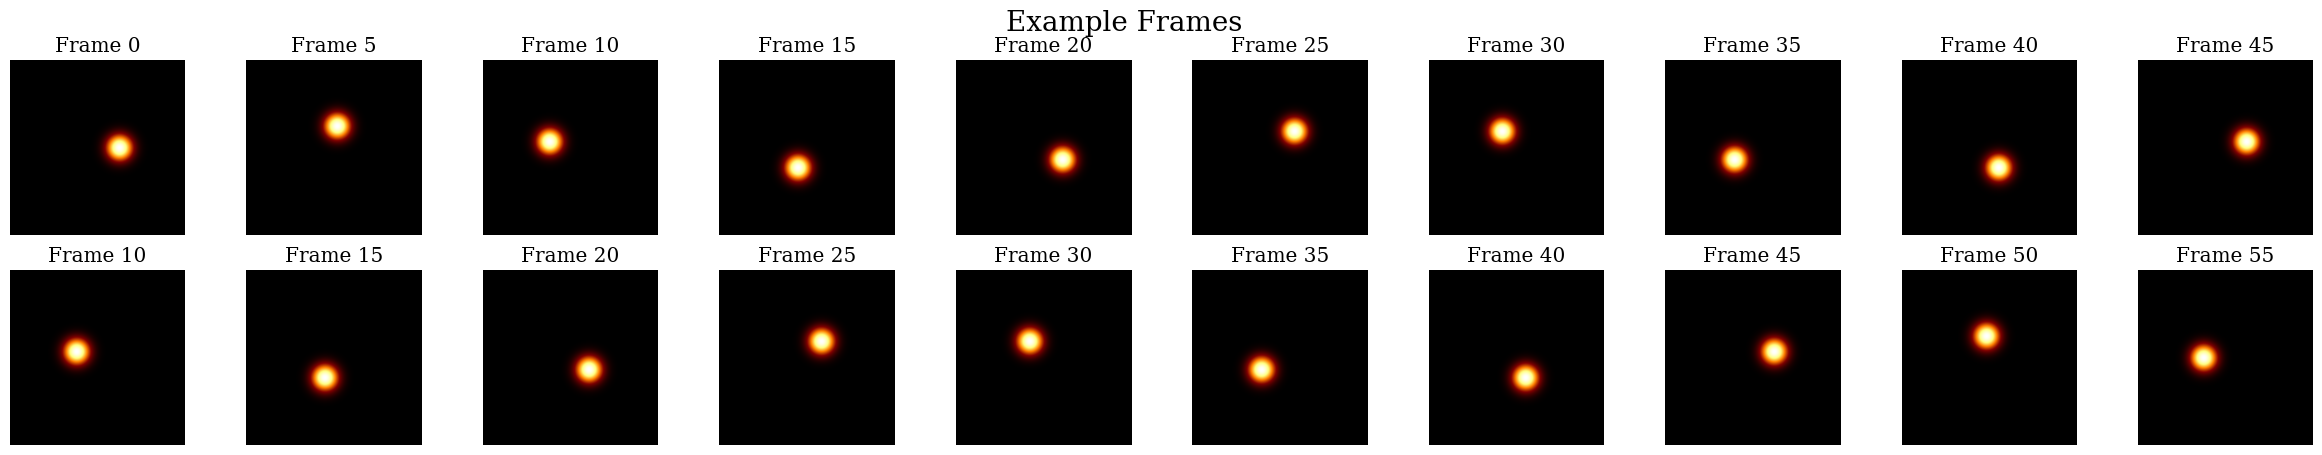

In [5]:
rows, columns = 2, 10
fig, ax = plt.subplots(rows, columns, figsize=(30,5))
delta_frame = num_frames // (rows * columns)
for i in range(rows):
    for j in range(columns):
        idx = i * columns + j * delta_frame
        ax[i, j].imshow(frames[idx], cmap="afmhot", vmin=0, vmax=1)
        ax[i, j].set_title(f"Frame {idx}")
        ax[i, j].axis("off")
fig.suptitle("Example Frames", fontsize=20, y=0.98)
plt.show()

Save Hot Spot As eht-imging Movie

In [6]:
import os

# Define the parameters of the observation
ra, dec, mjd, psize, rf, source, polrep = 17.761121055814954, -29.0078430557251, 57854, 2.4240684055470684e-12, 227070703125.0, 'SgrA', 'stokes'
times = [10.85, 10.8793578, 10.9087156, 10.93807339, 10.96743119, 10.99678899,
          11.02614679, 11.05550459, 11.08486239, 11.11422018, 11.14357798, 11.17293578,
          11.20229358, 11.23165138, 11.26100917, 11.29036697, 11.31972477, 11.34908257,
          11.37844037, 11.40779817, 11.43715596, 11.46651376, 11.49587156, 11.52522936,
          11.55458716, 11.58394495, 11.61330275, 11.64266055, 11.67201835, 11.70137615,
          11.73073394, 11.76009174, 11.78944954, 11.81880734, 11.84816514, 11.87752294,
          11.90688073, 11.93623853, 11.96559633, 11.99495413, 12.02431193, 12.05366972,
          12.08302752, 12.11238532, 12.14174312, 12.17110092, 12.20045872, 12.22981651,
          12.25917431, 12.28853211, 12.31788991, 12.34724771, 12.3766055, 12.4059633,
          12.4353211, 12.4646789, 12.4940367, 12.5233945, 12.55275229, 12.58211009,
          12.61146789, 12.64082569, 12.67018349, 12.69954128, 12.72889908, 12.75825688,
          12.78761468, 12.81697248, 12.84633028, 12.87568807, 12.90504587, 12.93440367,
          12.96376147, 12.99311927, 13.02247706, 13.05183486, 13.08119266, 13.11055046,
          13.13990826, 13.16926606, 13.19862385, 13.22798165, 13.25733945, 13.28669725,
          13.31605505, 13.34541284, 13.37477064, 13.40412844, 13.43348624, 13.46284404,
          13.49220183, 13.52155963, 13.55091743, 13.58027523, 13.60963303, 13.63899083,
          13.66834862, 13.69770642, 13.72706422, 13.75642202, 13.78577982, 13.81513761,
          13.84449541, 13.87385321, 13.90321101, 13.93256881, 13.96192661, 13.9912844,
          14.0206422, 14.05]

# Create the ehtim Movie object
hotspot_movie = Movie(
    frames=frames,
    times=times,
    psize=psize,
    ra=ra,
    dec=dec,
    rf=rf,
    polrep=polrep,
    source=source,
    mjd=mjd
)

# Save the movie to an HDF5 file
movies_dir = "../../movies"
os.makedirs(movies_dir, exist_ok=True)
output_path = os.path.join(movies_dir, "orbiting_hs.hdf5")
hotspot_movie.save_hdf5(output_path)

Make Simulation Observational Data From Movie

Splitting Observation File into 110 times


1it [00:00,  6.89it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


4it [00:00,  8.99it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


6it [00:00,  9.30it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


8it [00:00,  9.58it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


10it [00:01,  9.44it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


13it [00:01, 10.06it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


15it [00:01, 10.69it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


19it [00:01, 12.05it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 


21it [00:02, 12.04it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


25it [00:02, 11.82it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


27it [00:02, 12.12it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


31it [00:02, 11.43it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


33it [00:03, 11.36it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


37it [00:03, 11.80it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


39it [00:03, 12.37it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


43it [00:03, 12.97it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


45it [00:04, 12.26it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


49it [00:04, 12.07it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


51it [00:04, 12.10it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


55it [00:04, 12.28it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


57it [00:05, 12.88it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


61it [00:05, 11.87it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


63it [00:05, 12.07it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


65it [00:05, 11.17it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


69it [00:06, 11.92it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


71it [00:06, 11.74it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


75it [00:06, 12.53it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


77it [00:06, 12.23it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


81it [00:06, 13.20it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


83it [00:07, 11.83it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


87it [00:07, 12.96it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


89it [00:07, 12.59it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


93it [00:07, 13.21it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


95it [00:08, 12.80it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


97it [00:08, 12.51it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


101it [00:08, 12.34it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


103it [00:08, 12.35it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


107it [00:09, 12.60it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


110it [00:09, 11.80it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


number of pixels:  92.82336985543432
max:  251.3425403226787
min:  5.966779542271603
max vis:  2513.4253390055487
min vis:  59.66509012838729
Max number of visibilities: 342


0it [00:00, ?it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 12.019604102841376
num_vis:  171 8.870921551691668e-06


1it [00:00,  3.22it/s]

num_vis:  171 8.870753203778573e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 11.561018367262758
num_vis:  171 9.436922266584414e-06


2it [00:00,  3.70it/s]

num_vis:  171 9.43676036554666e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 12.91478414320721
num_vis:  171 8.838804202294055e-06


3it [00:00,  3.85it/s]

num_vis:  171 8.838735646194801e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 12.900413171177165
num_vis:  171 1.3588350366276901e-05


5it [00:02,  1.71it/s]

num_vis:  171 1.3588901817301253e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 11.979812442254213
num_vis:  171 8.59101875543984e-06
num_vis:  171 8.591042356181372e-06
Producing clean visibilities from image with direct FT . . . 


6it [00:02,  2.30it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 11.353361140034803
num_vis:  171 8.847394576842891e-06
num_vis:  171 8.847429172799257e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


8it [00:02,  3.54it/s]

num_vis:  171 13.030234343371628
num_vis:  171 9.886479918741945e-06
num_vis:  171 9.886564584765292e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 11.34264596769723
num_vis:  171 9.729570041759136e-06
num_vis:  171 9.729479201333723e-06
Producing clean visibilities from image with direct FT . . . 


9it [00:02,  4.36it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 12.157233932687896
num_vis:  171 9.531153321331387e-06
num_vis:  171 9.530946025296068e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  171 12.824653089709306
num_vis:  171 1.620524851293388e-05


11it [00:03,  5.12it/s]

num_vis:  171 1.620493120362606e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  342 24.77820869483251
num_vis:  342 1.1895986899578281e-05
num_vis:  342 1.1895955186740137e-05
Producing clean visibilities from image with direct FT . . . 


12it [00:03,  5.65it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.641990374775022
num_vis:  153 6.553545561050247e-06
num_vis:  153 6.553589806422924e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


14it [00:03,  6.22it/s]

num_vis:  153 11.055171132845022
num_vis:  153 1.1985747252770327e-05
num_vis:  153 1.1985679633578334e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.125611207439443
num_vis:  153 1.0386930192148846e-05
num_vis:  153 1.0386818778409454e-05
Producing clean visibilities from image with direct FT . . . 


15it [00:03,  6.62it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.153058899507275
num_vis:  153 1.1002736651350451e-05
num_vis:  153 1.1003049555014095e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.303570479430341
num_vis:  153 8.488545041215202e-06


17it [00:03,  7.12it/s]

num_vis:  153 8.488696251610728e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.060634577907294
num_vis:  153 9.651599123683895e-06
num_vis:  153 9.651465133512745e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


19it [00:04,  7.51it/s]

num_vis:  153 10.814599281533614
num_vis:  153 1.1073734290156459e-05
num_vis:  153 1.1073455353854995e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.705114571565916
num_vis:  153 1.0223525606634614e-05
num_vis:  153 1.022359188438316e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


20it [00:04,  8.01it/s]

num_vis:  153 10.67013554773494
num_vis:  153 9.235598506959917e-06
num_vis:  153 9.23546359572571e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.254872596366722
num_vis:  153 1.0059086298161422e-05
num_vis:  153 1.0058944150815204e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.292716010722897
num_vis:  153 1.71506868444403e-05


23it [00:04,  8.97it/s]

num_vis:  153 1.7150927957873127e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.466761843583953
num_vis:  153 1.1069979075249856e-05
num_vis:  153 1.107016400218802e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


25it [00:04,  8.30it/s]

num_vis:  153 11.273132982874763
num_vis:  153 1.0313813852206602e-05
num_vis:  153 1.0313812264913546e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.961892629367302
num_vis:  153 7.5032801234958385e-06
num_vis:  153 7.503119201461287e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


27it [00:05,  9.25it/s]

num_vis:  153 11.052890271273277
num_vis:  153 8.367187665280156e-06
num_vis:  153 8.367297677474246e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.857775268522293
num_vis:  153 9.936272668381952e-06
num_vis:  153 9.936298452375396e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


29it [00:05,  7.87it/s]

num_vis:  153 10.688299932036346
num_vis:  153 7.693376651974491e-06
num_vis:  153 7.693501641471073e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  306 22.16799958939161
num_vis:  306 9.207148740764004e-06
num_vis:  306 9.20698583202737e-06
Producing clean visibilities from image with direct FT . . . 


30it [00:05,  7.68it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.399610500321028
num_vis:  153 9.565822642729952e-06
num_vis:  153 9.566181715743011e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


32it [00:05,  7.29it/s]

num_vis:  153 10.806228669860197
num_vis:  153 1.1546544531874375e-05
num_vis:  153 1.1546551490554637e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.373781063681994
num_vis:  153 8.339679959895029e-06
num_vis:  153 8.339730536519953e-06
Producing clean visibilities from image with direct FT . . . 


34it [00:05,  7.82it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.10375035577437
num_vis:  153 8.94151976834252e-06
num_vis:  153 8.941579224875862e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.345100728515511
num_vis:  153 9.995366077636356e-06
num_vis:  153 9.995497239741784e-06


35it [00:06,  8.16it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.95023540272949
num_vis:  153 9.19760515696552e-06
num_vis:  153 9.197865983699126e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


37it [00:06,  8.29it/s]

num_vis:  153 10.573754354182727
num_vis:  153 1.0473385333834805e-05
num_vis:  153 1.0473420115966447e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.967011828433467
num_vis:  153 1.0666571667904667e-05
num_vis:  153 1.0666578978853622e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


39it [00:06,  8.43it/s]

num_vis:  153 11.2059329044205
num_vis:  153 6.806566164807457e-06
num_vis:  153 6.806779360051054e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.933881554035228
num_vis:  153 1.0179576920750444e-05
num_vis:  153 1.0179476975050812e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


41it [00:06,  7.74it/s]

num_vis:  153 10.570577062436836
num_vis:  153 7.4786544599607905e-06
num_vis:  153 7.478674596257286e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.77241770385293
num_vis:  153 9.185737134507702e-06
num_vis:  153 9.185630492318332e-06
Producing clean visibilities from image with direct FT . . . 


42it [00:06,  7.87it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.91160565145127
num_vis:  153 8.690848220015522e-06
num_vis:  153 8.690887667979313e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


44it [00:07,  8.10it/s]

num_vis:  153 11.057263860762045
num_vis:  153 1.0874564820966915e-05
num_vis:  153 1.0874514547825812e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.288106873167537
num_vis:  153 7.78034961324097e-06
num_vis:  153 7.780609541977288e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


45it [00:07,  7.91it/s]

num_vis:  153 10.287469184641242
num_vis:  153 1.0171488938012122e-05
num_vis:  153 1.0171500951924648e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  306 22.891184630903545
num_vis:  306 1.0522531630871994e-05
num_vis:  306 1.0522435311987696e-05


47it [00:07,  7.54it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.154598427626507
num_vis:  153 1.3880527993542767e-05
num_vis:  153 1.388055445931016e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


49it [00:07,  7.66it/s]

num_vis:  153 10.208238812249412
num_vis:  153 9.021095768861483e-06
num_vis:  153 9.021085463894424e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.582476222138833
num_vis:  153 9.365241691434798e-06
num_vis:  153 9.365088300258203e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


51it [00:08,  6.98it/s]

num_vis:  153 10.678271837005758
num_vis:  153 1.1934405918089402e-05
num_vis:  153 1.1934228302911884e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.793006062516719
num_vis:  153 1.1876880694554606e-05
num_vis:  153 1.1876880404204172e-05
Producing clean visibilities from image with direct FT . . . 


52it [00:08,  7.37it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.14098166231198
num_vis:  153 1.1755792786724435e-05
num_vis:  153 1.175599221197928e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.345383114770634


54it [00:08,  7.12it/s]

num_vis:  153 6.153886274412769e-06
num_vis:  153 6.153906034091761e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.69993526642101
num_vis:  153 1.1441982891828585e-05
num_vis:  153 1.1442053065294986e-05
Producing clean visibilities from image with direct FT . . . 


55it [00:08,  7.18it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.832752138691891
num_vis:  153 9.496996931920067e-06
num_vis:  153 9.496948120326866e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


57it [00:09,  7.21it/s]

num_vis:  153 11.292464219755026
num_vis:  153 1.0372388356751463e-05
num_vis:  153 1.0372318020552092e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.313584404240364
num_vis:  153 1.1938280137694957e-05
num_vis:  153 1.1938524005326728e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


59it [00:09,  7.44it/s]

num_vis:  153 10.58137077197229
num_vis:  153 9.535682340261094e-06
num_vis:  153 9.535747478552625e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.635209544398204
num_vis:  153 7.281157452961039e-06
num_vis:  153 7.281059582535003e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


61it [00:09,  7.68it/s]

num_vis:  153 11.38182811916672
num_vis:  153 1.0366324232150487e-05
num_vis:  153 1.0366447549905488e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.534906982241802
num_vis:  153 1.2978237104876662e-05
num_vis:  153 1.2978125889424124e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


63it [00:09,  8.23it/s]

num_vis:  153 10.835908508674166
num_vis:  153 8.152544096667072e-06
num_vis:  153 8.15257392782779e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.684761606033554
num_vis:  153 8.023297948570056e-06
num_vis:  153 8.02339556462706e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


65it [00:10,  7.39it/s]

num_vis:  306 22.139273743687802
num_vis:  306 1.1168490768130143e-05
num_vis:  306 1.1168580778257352e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.616504661742093
num_vis:  153 8.679169785158478e-06
num_vis:  153 8.679262955031858e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


67it [00:10,  7.84it/s]

num_vis:  153 11.105901908397136
num_vis:  153 1.0496462517387568e-05
num_vis:  153 1.049651384836474e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.734426212758606
num_vis:  153 8.279680095219566e-06
num_vis:  153 8.279749018271053e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


69it [00:10,  8.18it/s]

num_vis:  153 11.529326203595001
num_vis:  153 9.35214063319309e-06
num_vis:  153 9.352017558020484e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.611362442239637
num_vis:  153 9.978465676975845e-06
num_vis:  153 9.978367235764334e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


71it [00:10,  7.88it/s]

num_vis:  153 10.89180297131379
num_vis:  153 1.4354490282586292e-05
num_vis:  153 1.4354461016425978e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 9.72484873332711
num_vis:  153 8.581652186073489e-06
num_vis:  153 8.581628419716585e-06
Producing clean visibilities from image with direct FT . . . 


72it [00:10,  8.29it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.82772125248847
num_vis:  153 1.2847004380936847e-05
num_vis:  153 1.2847074002703195e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.490668333835306
num_vis:  153 1.339527998774848e-05
num_vis:  153 1.3395526746873477e-05


74it [00:11,  8.23it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.004921439650854
num_vis:  153 8.95442517486841e-06
num_vis:  153 8.95442071090329e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


76it [00:11,  8.16it/s]

num_vis:  153 11.31127634136499
num_vis:  153 1.2413676956002247e-05
num_vis:  153 1.2413613149195975e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.011653652045169
num_vis:  153 1.112040850964999e-05
num_vis:  153 1.1120391852337686e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


78it [00:11,  8.41it/s]

num_vis:  153 9.950890243630074
num_vis:  153 8.20052333225249e-06
num_vis:  153 8.200632716061548e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.439971852453109
num_vis:  153 8.235650472835087e-06
num_vis:  153 8.23567362948974e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.35921192708123
num_vis:  153 1.1480851383579819e-05
num_vis:  153 1.1480914459282132e-05
Producing clean visibilities from image with direct FT . . . 


80it [00:11,  9.27it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 12.025091462114357
num_vis:  153 1.0218705421283628e-05
num_vis:  153 1.0218879771551755e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.542985095266024
num_vis:  153 9.753279015228373e-06
num_vis:  153 9.753063243549e-06


82it [00:12,  7.48it/s]

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  306 22.62616192965818
num_vis:  306 1.1985504200447952e-05
num_vis:  306 1.198566110791609e-05
Producing clean visibilities from image with direct FT . . . 


84it [00:12,  8.45it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.577093774803718
num_vis:  153 1.2099613795097948e-05
num_vis:  153 1.2099610188567395e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.79401586085673
num_vis:  153 9.265098562302644e-06
num_vis:  153 9.265129869704495e-06
Producing clean visibilities from image with direct FT . . . 


85it [00:12,  8.40it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.45735970551246
num_vis:  153 9.711091370669324e-06
num_vis:  153 9.711095885153339e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.838487955445142
num_vis:  153 1.0787134144366337e-05


87it [00:12,  8.63it/s]

num_vis:  153 1.0787282847178086e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.471472757798917
num_vis:  153 1.055434155995684e-05
num_vis:  153 1.05540894212405e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


89it [00:12,  8.49it/s]

num_vis:  153 10.917093359144989
num_vis:  153 9.952254307265493e-06
num_vis:  153 9.952216580566421e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.667958426299222
num_vis:  153 8.526266862097947e-06
num_vis:  153 8.526632308673756e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


91it [00:13,  8.88it/s]

num_vis:  153 11.445510167713625
num_vis:  153 1.1585831165480834e-05
num_vis:  153 1.1585633761203441e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.520237770035058
num_vis:  153 1.1342889087945243e-05
num_vis:  153 1.1343069913431684e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


93it [00:13,  8.58it/s]

num_vis:  153 10.29356753287803
num_vis:  153 1.0805911859514021e-05
num_vis:  153 1.0806152750530362e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.342249739179668
num_vis:  153 9.57675221505395e-06
num_vis:  153 9.576620528297416e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


95it [00:13,  8.71it/s]

num_vis:  153 10.446569993055999
num_vis:  153 8.844134659098763e-06
num_vis:  153 8.844184833174877e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.832135733620122
num_vis:  153 9.528657356882538e-06
num_vis:  153 9.528538070564813e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


97it [00:13,  8.31it/s]

num_vis:  153 10.856995158965614
num_vis:  153 8.441458317704282e-06
num_vis:  153 8.44113077030268e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.693075408044544
num_vis:  153 1.0781293110942904e-05
num_vis:  153 1.0780958004796662e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


98it [00:14,  8.34it/s]

num_vis:  153 10.786508889599679
num_vis:  153 9.376312017512235e-06
num_vis:  153 9.376179025244239e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  306 22.2507522381193
num_vis:  306 1.1736512824653672e-05


100it [00:14,  6.53it/s]

num_vis:  306 1.173654375789743e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 10.681193450844123
num_vis:  153 1.0136788158108003e-05
num_vis:  153 1.0136915725573812e-05
Producing clean visibilities from image with direct FT . . . 


101it [00:14,  6.39it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  153 11.976353860817461
num_vis:  153 1.0595987821725687e-05
num_vis:  153 1.05957970140831e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


103it [00:14,  6.93it/s]

num_vis:  153 11.045779084444352
num_vis:  153 1.1986935488399319e-05
num_vis:  153 1.1986992864362832e-05
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  136 9.057023833893146
num_vis:  136 8.821327885974422e-06
num_vis:  136 8.821203593379676e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


106it [00:15,  9.09it/s]

num_vis:  136 9.519079295279436
num_vis:  136 8.12237490795277e-06
num_vis:  136 8.122460223070688e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  136 10.950616486782739
num_vis:  136 8.437080674111015e-06
num_vis:  136 8.437011902805893e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  136 9.189362446891318
num_vis:  136 8.147571207306357e-06
num_vis:  136 8.14766369078561e-06
Producing clean visibilities from image with direct FT . . . 


107it [00:15,  8.53it/s]

Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  136 9.32471578001516
num_vis:  136 7.927003535942571e-06
num_vis:  136 7.92697173706764e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


109it [00:15,  8.44it/s]

num_vis:  136 9.2562780030742
num_vis:  136 8.270937828272642e-06
num_vis:  136 8.271042442137496e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 
num_vis:  136 9.63228620516172
num_vis:  136 9.768607715974395e-06
num_vis:  136 9.768765485062524e-06
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


110it [00:15,  7.06it/s]


num_vis:  136 9.437895768229335
num_vis:  136 7.614314460924652e-06
num_vis:  136 7.614242454465105e-06
1.0088960472520677e-05
Building NX table


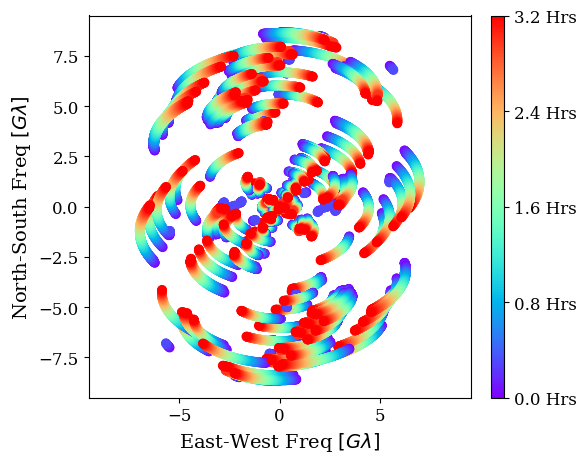

In [7]:
from make_data import resize_images, save_movie_to_hdf5, create_obs, plot_uv_coverage, diagnostics, generate_data
# NOTE: uncomment if ngEHT array is used
# array_path = 'ngEHT.txt'
# array = eh.array.load_txt(array_path)

hs_data_dir = "../../hs_data"
os.makedirs(hs_data_dir, exist_ok=True)

# array = "ngEHT" # NOTE: uncomment if ngEHT array is used
array = ['ALMA', 'APEX', 'GLT', 'JCMT', 'KP', 'LMT', 'SMA', 'SMT', 'SPT', 'BAJA', 'BAR', 'CAT', 
        'CNI', 'GAM', 'GARS', 'HAY', 'NZ', 'OVRO', 'SGO', 'CAS', 'LLA', 'PIKE', 'PV']
array_name = 'ngEHT_plus'
movie_name = "orbiting_hs"
noisy = False  # Set to True to add phase and amplitude errors to the data, though this hasn't been tested yet with this additional noise
fractional_noise = 0.1 # Fractional noise level to add to the data
is_array = type(array) is not list # True if array is a list of strings, False if it is a string
if noisy:
    obs_path = os.path.join(hs_data_dir, f"{array_name}/{movie_name}_f{fractional_noise}_noisy")
else:
    obs_path = os.path.join(hs_data_dir, f"{array_name}/{movie_name}_f{fractional_noise}")
os.makedirs(obs_path, exist_ok=True)

movie = eh.movie.load_hdf5(f"../../movies/{movie_name}.hdf5")
ims = movie.im_list()
npix = int(np.sqrt(len(ims[0]._imdict['I']))) # =400
npix_old = npix

scale_factor = 5
npix = npix // scale_factor
psize = ims[0].psize
new_psize = ims[0].psize * scale_factor  # Adjust pixel size accordingly


ims = resize_images(ims, npix, npix_old, new_psize)
save_movie_to_hdf5(ims, movie, os.path.join(obs_path, "gt_video.hdf5"))
obs, obs_frames, prior, fov = create_obs(ims[0], movie, npix, array, is_array=is_array)
plot_uv_coverage(obs, f"{array_name}_coverage.png") # plots the uv coverage of the array
max_vis = diagnostics(ims, obs_frames, fractional_noise, prior, fov, npix_old, noisy)

generate_data(obs_path, obs_frames, fractional_noise, ims, prior, npix, max_vis, noisy)